# MLP

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Processamento 

In [2]:
df = pd.read_csv(r"C:\Users\annab\OneDrive\Documentos\GitHub\Colabs\bases\data_prema.csv")

In [3]:
df['CLASSE'] = df['GESTACAO'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)
print(df['CLASSE'].value_counts())

CLASSE
0    469381
1     56987
Name: count, dtype: int64


In [4]:
print(df.isnull().sum())
print(df.describe())
print(df['CLASSE'].value_counts())

CODESTAB        2785
CODMUNNASC         0
LOCNASC            0
IDADEMAE           0
ESTCIVMAE       3656
               ...  
PARIDADE           0
KOTELCHUCK         0
CONTADOR           0
ORIGEM        400157
CLASSE             0
Length: 62, dtype: int64
           CODESTAB    CODMUNNASC        LOCNASC       IDADEMAE  \
count  5.235830e+05  526368.00000  526368.000000  526368.000000   
mean   2.926934e+06  261216.64844       1.016441      26.436398   
std    2.457727e+06    4355.74106       0.189859       6.713817   
min    2.400000e+01  110012.00000       1.000000      11.000000   
25%    2.344882e+06  260600.00000       1.000000      21.000000   
50%    2.430711e+06  261110.00000       1.000000      26.000000   
75%    2.711958e+06  261160.00000       1.000000      31.000000   
max    9.954279e+06  530010.00000       9.000000      99.000000   

           ESTCIVMAE         ESCMAE     CODOCUPMAE     QTDFILVIVO  \
count  522712.000000  523782.000000  507445.000000  523369.000000   
me

In [5]:
df = df.drop(['IDADEPAI', 'DTNASCMAE','STDNEPIDEM', 'STDNNOVA','TPAPRESENT', 'STTRABPART','TPMETESTIM','IDANOMAL', 'CODANOMAL','CODOCUPMAE','CODESTAB', 'CODMUNNASC', 'LOCNASC', 'CODMUNRES', 'DTNASC', 'HORANASC','PARTO', 'PESO', 'APGAR1', 'APGAR5', 'DTCADASTRO', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'DTULTMENST', 'CONSPRENAT', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'CODPAISRES', 'TPROBSON', 'KOTELCHUCK', 'CONTADOR', 'ORIGEM'], axis=1)

In [6]:
print(df.dtypes)

for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print()

IDADEMAE        int64
ESTCIVMAE     float64
ESCMAE        float64
QTDFILVIVO    float64
QTDFILMORT    float64
GESTACAO      float64
GRAVIDEZ      float64
CONSULTAS     float64
SEXO            int64
RACACOR       float64
ESCMAE2010    float64
SERIESCMAE    float64
RACACORMAE    float64
QTDGESTANT    float64
QTDPARTNOR    float64
QTDPARTCES    float64
SEMAGESTAC    float64
MESPRENAT     float64
ESCMAEAGR1    float64
PARIDADE        int64
CLASSE          int64
dtype: object
Coluna: IDADEMAE
[29 37 16 22 33 20 36 32 31 27 30 23 24 28 21 25 34 41 18 35 26 40 39 43
 38 19 15 14 17 45 44 42 13 50 46 47 52 48 12 51 53 11 57 58 99 49 55 54
 63 61 64 62 60]

Coluna: ESTCIVMAE
[ 1.  2.  9.  5. nan  4.  3.]

Coluna: ESCMAE
[ 9.  4.  5.  1.  3. nan  2.]

Coluna: QTDFILVIVO
[ 1.  0.  3.  2.  4. nan  9.  7.  5.  6.  8. 14. 11. 10. 13. 99. 12. 16.
 18. 15. 19. 30.]

Coluna: QTDFILMORT
[ 1.  0.  2. nan  4.  3.  9.  5. 10. 12.  7.  8.  6. 99. 13. 11. 21. 20.
 14. 17.]

Coluna: GESTACAO
[nan  3.  5.  6. 

# Modelo desbalanceado

In [7]:
X = df.drop('CLASSE', axis=1) 
y = df['CLASSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(X_train, y_train, 
                    validation_split=0.3, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1)


Epoch 1/100
8060/8060 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8910 - loss: 0.3677 - val_accuracy: 0.8917 - val_loss: 0.3430
Epoch 2/100
8060/8060 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.8911 - loss: 0.3444 - val_accuracy: 0.8917 - val_loss: 0.3429
Epoch 3/100
8060/8060 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8909 - loss: 0.3449 - val_accuracy: 0.8917 - val_loss: 0.3429
Epoch 4/100
8060/8060 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8928 - loss: 0.3408 - val_accuracy: 0.8917 - val_loss: 0.3429
Epoch 5/100
8060/8060 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8904 - loss: 0.3458 - val_accuracy: 0.8917 - val_loss: 0.3429
Epoch 6/100
8060/8060 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8916 - loss: 0.3434 - val_accuracy: 0.8917 - val_loss: 0.3432
Epoch 7/100
8060/8060 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8925 - loss: 0.3415 - val_accuracy: 0.8917 - val_loss: 0.3431
Epoch 8/100
8060/8060 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8911 -

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

4935/4935 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8925 - loss: 0.3414
Loss: 0.34212547540664673, Accuracy: 0.8920974731445312


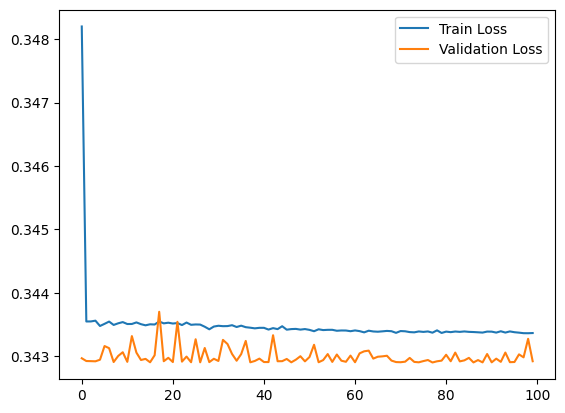

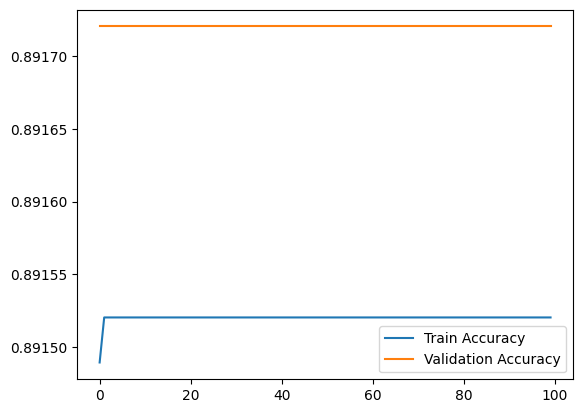

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [12]:
predictions = model.predict(X_test)
predictions = (predictions > 0.7).astype(int)
print(predictions[:10])

4935/4935 ━━━━━━━━━━━━━━━━━━━━ 5s 912us/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


# Modelo Balanceado

In [13]:
X = df.drop('CLASSE', axis=1)
y = df['CLASSE']

In [14]:
from sklearn.utils import resample

df_combined = pd.concat([X, y], axis=1)

df_majority = df_combined[df_combined['CLASSE'] == 0]
df_minority = df_combined[df_combined['CLASSE'] == 1]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,  # Sem reposição
                                   n_samples=len(df_minority),  # Igualar à classe minoritária
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
X_balanced = df_balanced.drop('CLASSE', axis=1)
y_balanced = df_balanced['CLASSE']

print(y_balanced.value_counts())


CLASSE
0    56987
1    56987
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=32, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/100


c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1746/1746 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5002 - loss: 0.6930 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 2/100
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 3/100
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5056 - loss: 0.6931 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 4/100
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5040 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 5/100
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4978 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 6/100
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 7/100
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5061 - loss: 0.6931 - val_accuracy: 0.4980 - val_loss: 0.6931
Epoch 8/100
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5017 - loss: 0.6932 - val_

In [17]:
predictions = model.predict(X_test)
predictions = (predictions > 0.7).astype(int)
print(predictions[:10])

1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
